In this script, we generate a map of New York Counties, color coded based on whether these counties have increased, decreased, or not changed in total mme per person after I-STOP became effective (August 2013).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/HED challenge/dataset w  filtered drugs, pharmacies, and mme conversion/county_trend_directions.csv")

In [ ]:
df.head()

,Unnamed: 0,County Name,Trend Direction
0,0,ALBANY,decreased
1,1,ALLEGANY,increased
2,2,BRONX,decreased
3,3,BROOME,decreased
4,4,CATTARAUGUS,neutral


In [ ]:
ny_counties = gpd.read_file('/content/drive/MyDrive/HED challenge/Counties.shp')

In [ ]:
ny_counties.head()

,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,NYSP_ZONE,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Albany,ALBA,974099,36001,010000,East,292594,294565,304204,314848,None,0000/00/00,N,532.791779,2017/11/10,166077.834242,1.379924e+09,"POLYGON ((605729.038 4737866.883, 606008.186 4..."
1,Allegany,ALLE,974100,36003,020000,West,50470,49927,48946,46456,None,0000/00/00,N,1035.209131,2019/04/26,210499.339692,2.681179e+09,"POLYGON ((229573.87 4712922.87, 229713.78 4712..."
2,Bronx,BRON,974101,36005,600000,Long Island,1203789,1332650,1385108,1472654,None,0000/00/00,Y,57.472148,2019/10/04,57253.861278,1.488522e+08,"POLYGON ((595540.679 4528518.902, 595766.658 4..."
3,Broome,BROO,974102,36007,030000,Central,212160,200536,200600,198683,None,0000/00/00,N,715.287465,2019/04/26,227933.332021,1.852586e+09,"POLYGON ((428899.262 4696276.376, 428927.641 4..."
4,Cattaraugus,CATT,974103,36009,040000,West,84234,83955,80317,77042,None,0000/00/00,N,1324.309219,2019/04/26,276084.505177,3.429945e+09,"POLYGON ((169747.34 4717358.9, 169915.5 471724..."


In [ ]:
ny_counties['NAME'] = ny_counties['NAME'].str.upper()
ny_map = ny_counties.merge(df, left_on="NAME", right_on="County Name", how="left")


In [ ]:
from matplotlib.colors import ListedColormap
colors = {
    'increased': '#4682B4',
    'decreased': '#FF6347',
    'neutral': '#90EE90',
    'No Data': '#D3D3D3'
}
cmap = ListedColormap([colors['increased'], colors['decreased'], colors['neutral']])


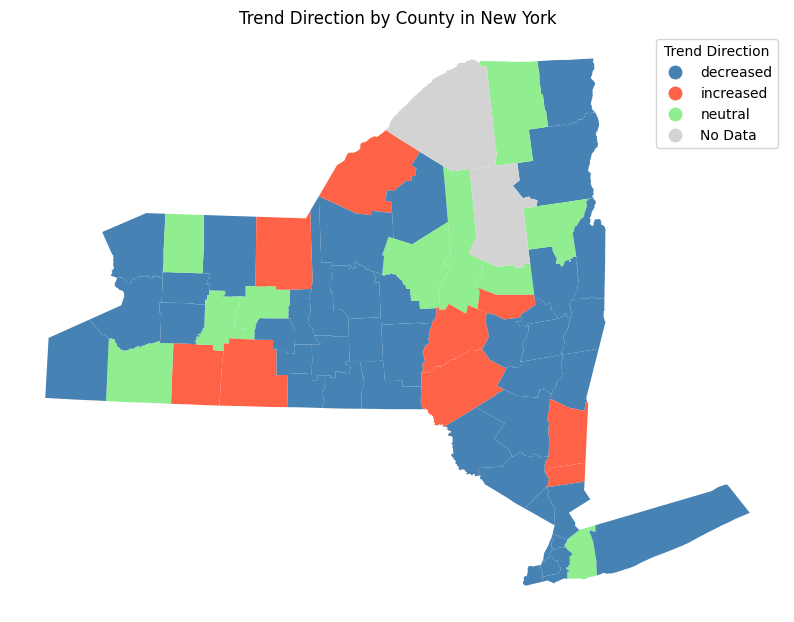

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
ny_map.plot(column='Trend Direction', cmap=cmap, ax=ax, legend=True,
            legend_kwds={'title': 'Trend Direction'},
            missing_kwds={'color': colors['No Data'], 'label': 'No Data'})

ax.set_title('Trend Direction by County in New York')
ax.set_axis_off()

plt.show()